In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.2            1744 non-null   int64  
 1   Unnamed: 0.1            1744 non-null   int64  
 2   Unnamed: 0              1744 non-null   int64  
 3   환자ID                    1744 non-null   object 
 4   Large Lymphocyte        1744 non-null   float64
 5   Location of herniation  1744 non-null   int64  
 6   가족력                     1744 non-null   float64
 7   간질성폐질환                  1744 non-null   int64  
 8   고혈압여부                   1744 non-null   int64  
 9   과거수술횟수                  1744 non-null   int64  
 10  당뇨여부                    1744 non-null   int64  
 11  말초동맥질환여부                1744 non-null   int64  
 12  빈혈여부                    1744 non-null   int64  
 13  성별                      1744 non-null   int64  
 14  스테로이드치료                 1744 non-null   

### 대상 분석 필요
- 변수 구조 확인
- 목표 변수 설정 : '입원기간 ' 정의
- 설명 변수 설정 : '신장','체중','종양진행여부','혈전합병증여부','수술기법','재발여부'

In [58]:
df_ROS_AP = df_ROS[['신장','체중','종양진행여부','혈전합병증여부','수술기법','재발여부','입원기간']]
df_ROS_AP

,신장,체중,종양진행여부,혈전합병증여부,수술기법,재발여부,입원기간
0,163,60.3,0,0,TELD,0,2
1,171,71.7,0,0,TELD,0,1
2,178,77.1,0,0,TELD,0,1
3,174,74.2,0,0,TELD,0,1
4,183,80.7,0,0,TELD,0,2
...,...,...,...,...,...,...,...
1739,163,52.0,0,0,TELD,0,12
1740,185,64.0,0,0,TELD,0,2
1741,160,60.0,0,0,TELD,0,3
1742,173,70.0,0,0,TELD,0,3


In [26]:
df_ROS_AP.describe()[:2] # 연속형

,신장,체중,종양진행여부,혈전합병증여부,재발여부,입원기간
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.00000
mean,168.047592,68.101319,0.002867,0.002294,0.115826,1.65367


In [27]:
df_ROS_AP.describe(include=object)[:5] # 범주형

,수술기법
count,1744
unique,2
top,TELD
freq,1609


In [35]:
df_ROS_AP.dtypes

신장           int64
체중         float64
종양진행여부      object
혈전합병증여부     object
수술기법        object
재발여부        object
입원기간         int64
dtype: object

In [37]:
# int-> object 변환 대상 : 종양진행여부, 혈전합병증여부, 재발여부
columns_to_convert = ['종양진행여부', '혈전합병증여부', '재발여부']
df_ROS_AP[columns_to_convert] = df_ROS_AP[columns_to_convert].astype(str)
df_ROS_AP.dtypes

C:\Users\04-02\AppData\Local\Temp\ipykernel_13064\2938258920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_AP[columns_to_convert] = df_ROS_AP[columns_to_convert].astype(str)


신장           int64
체중         float64
종양진행여부      object
혈전합병증여부     object
수술기법        object
재발여부        object
입원기간         int64
dtype: object

In [38]:
continuos_list = df_ROS_AP.describe().columns.to_list()

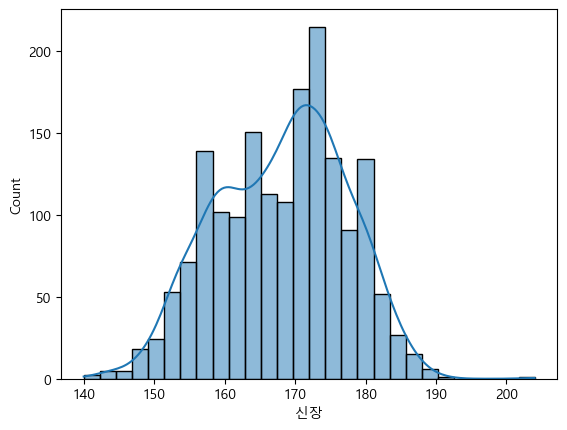

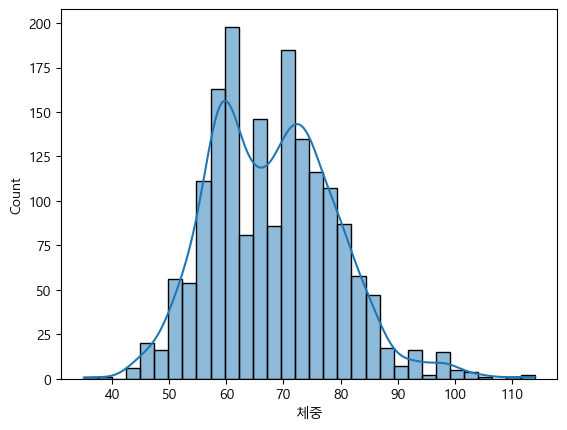

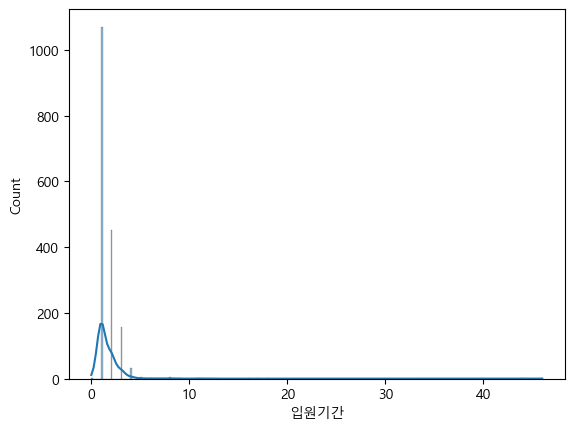

In [39]:
for continuos in continuos_list :
    sns.histplot(data=df_ROS_AP, x=continuos, kde=True)
    plt.show()

In [59]:
df_ROS[['입원기간', '입원일자', '퇴원일자']][:10]

,입원기간,입원일자,퇴원일자
0,2,20190713,20190716
1,1,20190715,20190716
2,1,20190729,20190801
3,1,20190731,20190803
4,2,20190903,20190907
5,1,20190905,20190907
6,1,20190622,20190626
7,1,20190330,20190402
8,1,20191203,20191206
9,2,20191210,20191213


#### 7. 종양진행여부와 입원기간

In [61]:
df_T = df_ROS_AP[['입원기간', '종양진행여부']]
df_T

,입원기간,종양진행여부
0,2,0
1,1,0
2,1,0
3,1,0
4,2,0
...,...,...
1739,12,0
1740,2,0
1741,3,0
1742,3,0


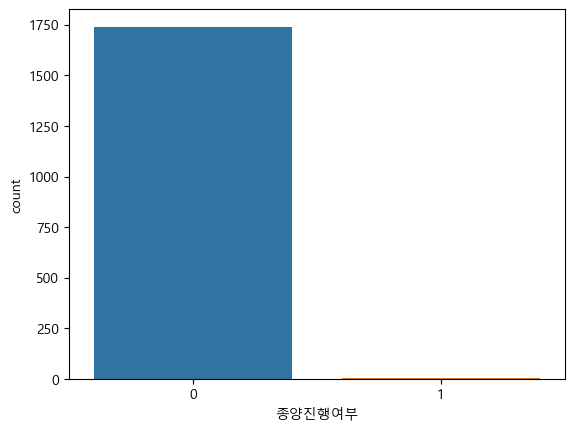

In [62]:
# 종양진행여부에 따른 환자 분류
tumor_chart = sns.countplot(data=df_T, x='종양진행여부')

In [63]:
# 전체 환자의 입원기간 평균
hospitalization_avg = df_ROS['입원기간'].mean()
hospitalization_avg

1.6536697247706422

In [64]:
# 종양진행여부따른 입원 기간 평균 비교
average = df_ROS.groupby('종양진행여부')['입원기간'].mean()
average

종양진행여부
0    1.652674
1    2.000000
Name: 입원기간, dtype: float64

#### 8. 혈전합병증여부와 입원기간

In [65]:
df_Th = df_ROS_AP[['입원기간', '혈전합병증여부']]
df_Th

,입원기간,혈전합병증여부
0,2,0
1,1,0
2,1,0
3,1,0
4,2,0
...,...,...
1739,12,0
1740,2,0
1741,3,0
1742,3,0


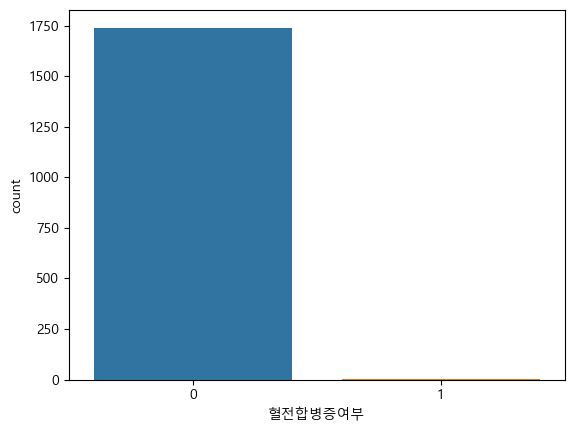

In [70]:
# 혈전합병증여부에 따른 환자 분류
thrombus_chart = sns.countplot(data=df_Th, x='혈전합병증여부')

In [67]:
# 혈전합병증여부에 따른 입원 기간 평균 비교
average = df_Th.groupby('혈전합병증여부')['입원기간'].mean()
average

혈전합병증여부
0    1.654023
1    1.500000
Name: 입원기간, dtype: float64

#### 9. 수술기법과 입원기간

In [69]:
df_Te = df_ROS[['수술기법', '입원기간']]
df_Te

,수술기법,입원기간
0,TELD,2
1,TELD,1
2,TELD,1
3,TELD,1
4,TELD,2
...,...,...
1739,TELD,12
1740,TELD,2
1741,TELD,3
1742,TELD,3


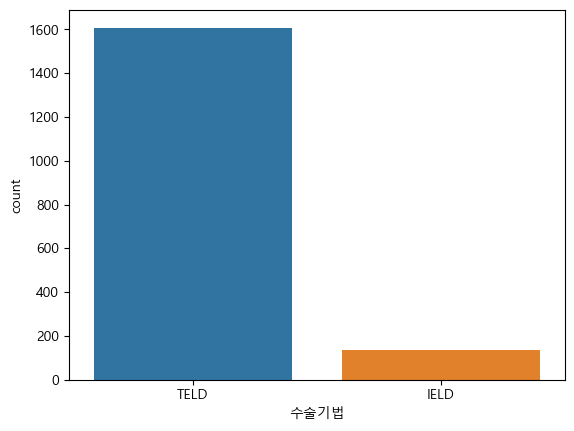

In [75]:
surgicaltechnique_chart = sns.countplot(data=df_Te, x='수술기법')

In [77]:
# 수술기법에 따른 환자 분류
average = df_ROS.groupby('수술기법')['입원기간'].mean()
average

수술기법
IELD    1.725926
TELD    1.647607
Name: 입원기간, dtype: float64

#### 10. 재발여부와 입원기간

In [82]:
df_R =  df_ROS[['재발여부', '입원기간']]
df_R

,재발여부,입원기간
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
1739,0,12
1740,0,2
1741,0,3
1742,0,3


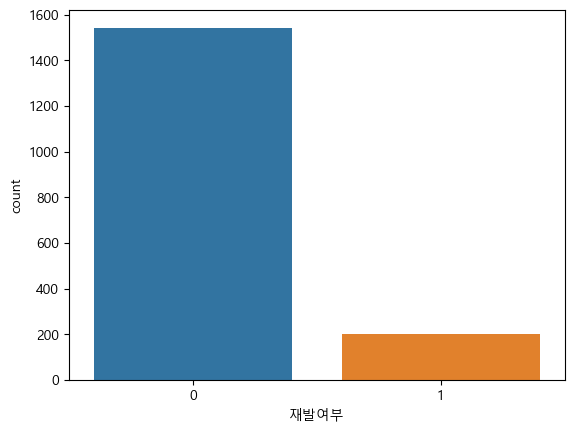

In [83]:
recurrence_chart = sns.countplot(data=df_R, x='재발여부')

In [84]:
# 재발에 따른 환자 분류
average = df_ROS.groupby('재발여부')['입원기간'].mean()
average

재발여부
0    1.668612
1    1.539604
Name: 입원기간, dtype: float64